In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

In [2]:
df = pd.read_csv (r'C:\Restricted\study\DataScience\TCD\MachineLearning\Week5Assignment\timeseries\timeseries_data.csv')
df= df.iloc[:,1:17] #17
df.dropna(inplace=True)
df.drop(columns='date',inplace=True)
indices_list = df.index.values
df.head()

,USAGE,rain,temp,wdsp,STATION_68.0,STATION_78.0,STATION_83.0,STATION_85.0,STATION_88.0,STATION_97.0,W1,W2,W3,W4,W5
5,28.0,0.0,7.0,6,1,0,0,0,0,0,40.0,30.0,31.0,39.00,15.00
14,1.0,0.0,-0.2,5,1,0,0,0,0,0,19.0,34.0,24.0,35.25,18.00
15,40.0,0.0,-0.3,3,1,0,0,0,0,0,1.0,19.0,34.0,24.00,35.25
16,24.0,0.4,12.7,9,1,0,0,0,0,0,40.0,1.0,19.0,34.00,24.00
17,26.0,0.0,3.3,3,1,0,0,0,0,0,24.0,40.0,1.0,19.00,34.00


In [4]:
y=df.loc[:, 'USAGE'] 

In [5]:
X_to_normalize_1=df.iloc[:,1:4]
X_to_normalize_2=df.iloc[:,10:15]

X_normalized_1 = normalize(X_to_normalize_1,norm='max', axis=0)
X_normalized_2 = normalize(X_to_normalize_2,norm='max', axis=0)
X_normalized_1df= pd.DataFrame(X_normalized_1,index= indices_list)
X_normalized_2df= pd.DataFrame(X_normalized_2,index= indices_list)


In [6]:
X_rest=df.iloc[:,4:10]
X = pd.concat([X_rest, X_normalized_1df, X_normalized_2df], axis=1,join='inner')
X.columns = [ 'rain', 'temp', 'wdsp', 'STATION_68.0', 'STATION_78.0',
       'STATION_83.0', 'STATION_85.0', 'STATION_88.0', 'STATION_97.0', 'W1',
       'W2', 'W3','W4', 'W5']
X

,rain,temp,wdsp,STATION_68.0,STATION_78.0,STATION_83.0,STATION_85.0,STATION_88.0,STATION_97.0,W1,W2,W3,W4,W5
5,1,0,0,0,0,0,0.000000,0.303030,0.230769,1.000000,0.750000,0.775,0.97500,0.375000
14,1,0,0,0,0,0,0.000000,-0.008658,0.192308,0.475000,0.850000,0.600,0.88125,0.450000
15,1,0,0,0,0,0,0.000000,-0.012987,0.115385,0.025000,0.475000,0.850,0.60000,0.881250
16,1,0,0,0,0,0,0.038835,0.549784,0.346154,1.000000,0.025000,0.475,0.85000,0.600000
17,1,0,0,0,0,0,0.000000,0.142857,0.115385,0.600000,1.000000,0.025,0.47500,0.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24129,0,0,0,0,0,1,0.000000,0.017316,0.115385,0.325000,0.300000,0.175,0.25000,0.141667
24130,0,0,0,0,0,1,0.000000,0.714286,0.423077,0.000000,0.325000,0.300,0.17500,0.250000
24131,0,0,0,0,0,1,0.000000,0.458874,0.307692,0.625000,0.000000,0.325,0.30000,0.175000
24132,0,0,0,0,0,1,0.000000,0.493506,0.576923,0.258333,0.625000,0.000,0.32500,0.300000


In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42)


In [8]:
baseline_model = DummyRegressor(strategy='mean').fit(X, y)
y_baseline = baseline_model.predict(X)

print("Mean squared error of baseline model %f"%(mean_squared_error(y,y_baseline)))

Mean squared error of baseline model 65.455916


In [9]:
linear_reg_model = LinearRegression().fit( X_train, y_train)

y_pred = linear_reg_model.predict(X_test)
y_train_pred = linear_reg_model.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(linear_reg_model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))

Mean squared error of test data 47.600869
Mean squared error of train data 49.329773
Cross Validation Scores Mean: -49.44127093520909
Cross Validation Scores Standard Deviation: 1.8996095315610906


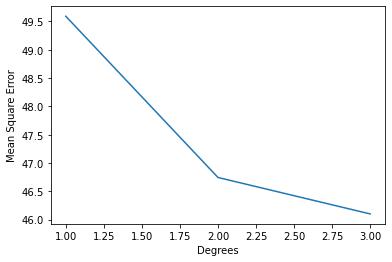

In [10]:
mean_err=[]; std_err=[]
degrees=[1,2,3]
for d in degrees:
    model = SVR(kernel="poly", C=100, gamma="auto", degree=d, epsilon=0.1, coef0=1) 
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    mean_err.append(np.array(mse).mean())
    std_err.append(np.array(mse).std())
plt.errorbar( degrees,mean_err, yerr=std_err)
plt.xlabel('Degrees') 
plt.ylabel('Mean Square Error')
plt.show()

In [11]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svr_poly.fit(X_train, y_train)
y_pred = svr_poly.predict(X_test)
y_train_pred = svr_poly.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(svr_poly, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))

Mean squared error of test data 44.729901
Mean squared error of train data 46.100147
Cross Validation Scores Mean: -46.756697143250044
Cross Validation Scores Standard Deviation: 1.9262173447806543


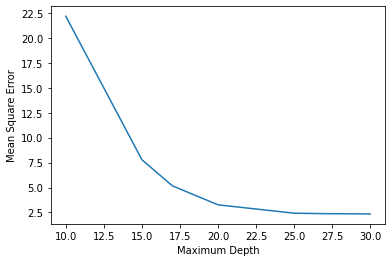

In [12]:
mean_err=[]; std_err=[]
max_depth=[10,15,17,20,25,27,30]
for m in max_depth:
    model = RandomForestRegressor(max_depth=m, random_state=0) 
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    mean_err.append(np.array(mse).mean())
    std_err.append(np.array(mse).std())
plt.errorbar( max_depth,mean_err, yerr=std_err)
plt.xlabel('Maximum Depth') 
plt.ylabel('Mean Square Error')
plt.show()

In [13]:

regr = RandomForestRegressor(max_depth=28, random_state=0) 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(regr, X_train, 17.064796098949568y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))

Mean squared error of test data 16.676385
Mean squared error of train data 2.371687
Cross Validation Scores Mean: -17.064796098949568
Cross Validation Scores Standard Deviation: 0.9201308224598058


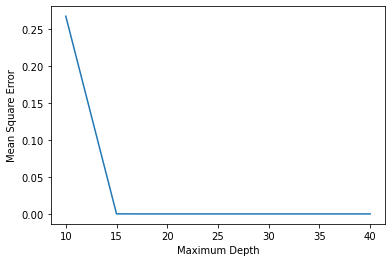

In [14]:
mean_err=[]; std_err=[]
max_depth=[10,15,17,20,25,30,40]
for m in max_depth:
    model = XGBRegressor(max_depth=m)
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    mean_err.append(np.array(mse).mean())
    std_err.append(np.array(mse).std())
plt.errorbar( max_depth,mean_err, yerr=std_err)
plt.xlabel('Maximum Depth') 
plt.ylabel('Mean Square Error')
plt.show()

In [15]:
model = XGBRegressor(max_depth=15) #,booster='dart',n_estimators=100
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))


Mean squared error of test data 17.130604
Mean squared error of train data 0.000061
Cross Validation Scores Mean: -18.2649807274693
Cross Validation Scores Standard Deviation: 0.9490547416204322
